### Portfolio assignment 14
Perform a bivariate analysis on at least 1 combination of 2 columns with categorical data in the dataset that you chose in portfolio assignment 4.
- Do you expect their to be a correlation between the two columns?
- Create a contingency table. Do you observe different ratios between categories here?
- Create a bar plot for this contingency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

In [1]:
import pandas as pd
import seaborn as sns

In [20]:
def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

In [21]:
from scipy.stats import chi2_contingency
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

In [2]:
Pokemon = pd.read_csv("Pokemon.csv", sep=";")

In [3]:
Pokemon.head()

,abilities,attack,capture_rate,classfication,defense,experience_growth,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Rock Head', 'Sturdy', 'Sand Veil', 'Magnet P...",80,255.0,Rock Pokémon,100,1059860,0,40,Geodude,50,74,30,30,20,rock,ground,0,1,0
1,"['Stench', 'Sticky Hold', 'Poison Touch', 'Poi...",80,190.0,Sludge Pokémon,50,1000000,0,80,Grimer,50,88,40,50,25,poison,poison,0,1,0
2,"['Rock Head', 'Sturdy', 'Sand Veil', 'Magnet P...",95,120.0,Rock Pokémon,115,1059860,0,55,Graveler,50,75,45,45,35,rock,ground,0,1,0
3,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",75,255.0,Mouse Pokémon,90,1000000,0,50,Sandshrew,50,27,10,35,40,ground,ice,0,1,0
4,"['Chlorophyll', 'Harvest', 'Frisk', 'Harvest']",105,45.0,Coconut Pokémon,85,1250000,0,95,Exeggutor,50,103,125,75,45,grass,psychic,0,1,0


### Ik verwacht dat er een kleine correlatie zal zijn tussen het type van een pokemon en of deze legendarisch is. Bepaalde type pokemon komen meer voor zoals water, de kans is daarom ook groter wanneer een pokemon water type is dat hij ook legendarisch is. 

In [25]:
PokemonContingencyTable = create_contingency_table(Pokemon, 'type1','is_legendary')

<AxesSubplot:xlabel='is_legendary'>

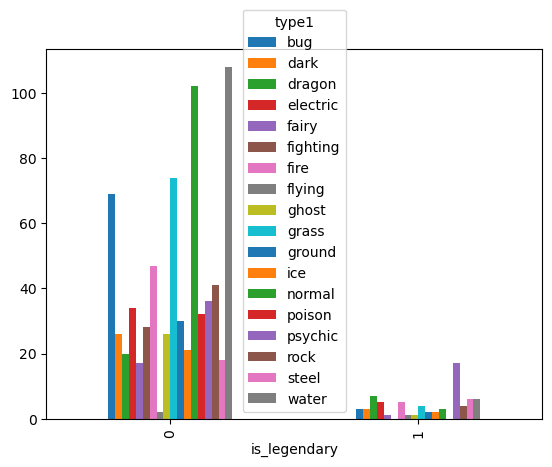

In [26]:
PokemonContingencyTable.plot(kind='bar')


In [27]:
check_cat_vs_cat_correlation(Pokemon, 'type1','is_legendary')

The odds of a correlation between type1 and is_legendary is 99.9999995467418% (Based on a p value of 4.532581978427316e-09).
This percentage needs to be at least 95% for a significant correlation.


### Zoals te zien is gaat mijn verwachting op voor de water type pokemon, er zijn er hier veel van en ook relatief veel legendarische pokemon. Mijn verwachtingen zijn incorrect als je kijkt naar andere categorieen, zo zijn er relatief weinig physic type pokemon maar deze zijn wel vaak legendarisch.

### Over het algemeen is er correlatie tussen type en is legendarisch maar deze is niet perfect.